# Exploring solution for dataset

In [4]:
import pandas as pd
import numpy as np
import cv2
import os
from ultralytics import YOLO
#import sys
#from ..src.pipeline import PredPipe

In [5]:
def extract_frames(video_path, output_folder, interval_seconds=5):
    cap = cv2.VideoCapture(video_path)
    frame_rate = int(cap.get(cv2.CAP_PROP_FPS))
    interval_frames = frame_rate * interval_seconds

    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        if frame_count % interval_frames == 0:
            output_filename = f"{output_folder}/frame_{frame_count}.jpg"
            cv2.imwrite(output_filename, frame)
            print(f"Saved {output_filename}")
        
        frame_count += 1

    cap.release()
    cv2.destroyAllWindows()

In [6]:
import cv2
import numpy as np

def add_noise_to_image(image_path, noise_pctg=0.1, blur_pctg=0.1):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.astype(np.float32) / 255.0

    # Add noise
    noise = np.random.uniform(low=0.0, high=1.0, size=image.shape)
    noise_mask = np.random.binomial(1, noise_pctg, size=image.shape[:-1])
    noise_mask = np.expand_dims(noise_mask, axis=-1)
    noise_mask = np.repeat(noise_mask, 3, axis=-1)
    image = noise_mask * noise + (1 - noise_mask) * image

    # Add blur
    blur_mask = np.random.binomial(1, blur_pctg, size=image.shape[:-1])
    blur_mask = np.expand_dims(blur_mask, axis=-1)
    blur_mask = np.repeat(blur_mask, 3, axis=-1)
    image = blur_mask * cv2.blur(image, (5, 5)) + (1 - blur_mask) * image

    image = (image * 255.0).astype(np.uint8)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image



In [7]:
def predict_image(image_path, model=YOLO("../models/yolo/yolov8m.pt"), add_noise=False, noise_pctg=0.1, blur_pctg=0.04):
    if add_noise:
        image = cv2.imread(image_path)
        noisy_image = add_noise_to_image(image_path, noise_pctg, blur_pctg)
        noisy_image_path = f"../data/processed/noisy/{image_path.split('.')[0]}_noisy.jpg"
        cv2.imwrite(noisy_image_path, noisy_image)
        image_path = noisy_image_path
    
    results = model.predict(image_path)
    result = results[0]
    #save model scores
    model_scores = []
    for box in result.boxes:
        model_scores.append(box.conf[0].item())
    img = cv2.imread(image_path)
    for box in result.boxes:
        class_id = result.names[box.cls[0].item()]
        cords = box.xyxy[0].tolist()
        cords = [round(x) for x in cords]
        conf = round(box.conf[0].item(), 2)
        cv2.rectangle(img, (cords[0], cords[1]), (cords[2], cords[3]), (0, 255, 0), 2)
        cv2.putText(img, f"{class_id} {conf}", (cords[0], cords[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
        #write predicted image to data/processed/outputs
        cv2.imwrite(f"../data/processed/noisy/{image_path.split('/')[-1].split('.')[0]}_predicted.jpg", img)
    return img, model_scores

In [8]:
model = YOLO('../models/yolo/yolov8m.pt')

In [9]:
import sys
sys.path.append('C:/Users/Thiago/OneDrive/Documentos/Facul/6 Sexto semestre/TCC/TCC-CDIA')


In [10]:
from pipeline import PredPipe

ModuleNotFoundError: No module named 'pipeline'

In [11]:
image = "../data/frames/images/1_original.jpg"



In [24]:
noise = [0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5] 

In [29]:
pred = PredPipe(model, image, 0, 0)
pred.predict_image(add_noise=False)


image 1/1 c:\Users\Thiago\OneDrive\Documentos\Facul\6 Sexto semestre\TCC\TCC-CDIA\notebooks\..\data\frames\images\3_original.jpg: 384x640 7 cars, 3 traffic lights, 541.1ms
Speed: 1.0ms preprocess, 541.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


(array([[[201, 165, 135],
         [201, 165, 135],
         [201, 165, 135],
         ...,
         [ 23,  21,   3],
         [ 31,  31,  13],
         [ 46,  46,  28]],
 
        [[201, 165, 135],
         [201, 165, 135],
         [201, 165, 135],
         ...,
         [ 23,  21,   3],
         [ 27,  27,   9],
         [ 38,  38,  20]],
 
        [[201, 165, 135],
         [201, 165, 135],
         [201, 165, 135],
         ...,
         [ 30,  30,  12],
         [ 28,  28,  10],
         [ 34,  34,  16]],
 
        ...,
 
        [[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0],
         ...,
         [  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0]],
 
        [[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0],
         ...,
         [  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0]],
 
        [[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0],
         ...,
         [ 52,  38,  49],
  

In [71]:
model_results = []
for element in noise:
    pred = PredPipe(model, image, element, 0)
    print({"noise": element, "blur": 0})
    pred.predict_image(add_noise = False)
    #save model results for every iteration to plot model performance in every noise level
    print("--------------------------------------------------")
    model_results.append({"noise": element, "model_scores": pred.results})

#save results to csv


{'noise': 0.01, 'blur': 0}



image 1/1 c:\Users\Thiago\OneDrive\Documentos\Facul\6 Sexto semestre\TCC\TCC-CDIA\notebooks\..\data\frames\images\1_original.jpg: 384x640 7 cars, 1 truck, 2 traffic lights, 501.6ms
Speed: 2.0ms preprocess, 501.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



--------------------------------------------------
{'noise': 0.03, 'blur': 0}


image 1/1 c:\Users\Thiago\OneDrive\Documentos\Facul\6 Sexto semestre\TCC\TCC-CDIA\notebooks\..\data\frames\images\1_original.jpg: 384x640 7 cars, 1 truck, 2 traffic lights, 552.8ms
Speed: 2.0ms preprocess, 552.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



--------------------------------------------------
{'noise': 0.05, 'blur': 0}


image 1/1 c:\Users\Thiago\OneDrive\Documentos\Facul\6 Sexto semestre\TCC\TCC-CDIA\notebooks\..\data\frames\images\1_original.jpg: 384x640 7 cars, 1 truck, 2 traffic lights, 526.6ms
Speed: 1.0ms preprocess, 526.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



--------------------------------------------------
{'noise': 0.07, 'blur': 0}


image 1/1 c:\Users\Thiago\OneDrive\Documentos\Facul\6 Sexto semestre\TCC\TCC-CDIA\notebooks\..\data\frames\images\1_original.jpg: 384x640 7 cars, 1 truck, 2 traffic lights, 521.0ms
Speed: 2.0ms preprocess, 521.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



--------------------------------------------------
{'noise': 0.09, 'blur': 0}


image 1/1 c:\Users\Thiago\OneDrive\Documentos\Facul\6 Sexto semestre\TCC\TCC-CDIA\notebooks\..\data\frames\images\1_original.jpg: 384x640 7 cars, 1 truck, 2 traffic lights, 491.9ms
Speed: 2.0ms preprocess, 491.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



--------------------------------------------------
{'noise': 0.11, 'blur': 0}


image 1/1 c:\Users\Thiago\OneDrive\Documentos\Facul\6 Sexto semestre\TCC\TCC-CDIA\notebooks\..\data\frames\images\1_original.jpg: 384x640 7 cars, 1 truck, 2 traffic lights, 539.6ms
Speed: 1.0ms preprocess, 539.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



--------------------------------------------------
{'noise': 0.13, 'blur': 0}


image 1/1 c:\Users\Thiago\OneDrive\Documentos\Facul\6 Sexto semestre\TCC\TCC-CDIA\notebooks\..\data\frames\images\1_original.jpg: 384x640 7 cars, 1 truck, 2 traffic lights, 548.5ms
Speed: 1.0ms preprocess, 548.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



--------------------------------------------------
{'noise': 0.15, 'blur': 0}


image 1/1 c:\Users\Thiago\OneDrive\Documentos\Facul\6 Sexto semestre\TCC\TCC-CDIA\notebooks\..\data\frames\images\1_original.jpg: 384x640 7 cars, 1 truck, 2 traffic lights, 478.8ms
Speed: 3.0ms preprocess, 478.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



--------------------------------------------------
{'noise': 0.17, 'blur': 0}


image 1/1 c:\Users\Thiago\OneDrive\Documentos\Facul\6 Sexto semestre\TCC\TCC-CDIA\notebooks\..\data\frames\images\1_original.jpg: 384x640 7 cars, 1 truck, 2 traffic lights, 439.9ms
Speed: 2.0ms preprocess, 439.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



--------------------------------------------------
{'noise': 0.2, 'blur': 0}


image 1/1 c:\Users\Thiago\OneDrive\Documentos\Facul\6 Sexto semestre\TCC\TCC-CDIA\notebooks\..\data\frames\images\1_original.jpg: 384x640 7 cars, 1 truck, 2 traffic lights, 471.7ms
Speed: 2.0ms preprocess, 471.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



--------------------------------------------------
{'noise': 0.25, 'blur': 0}


image 1/1 c:\Users\Thiago\OneDrive\Documentos\Facul\6 Sexto semestre\TCC\TCC-CDIA\notebooks\..\data\frames\images\1_original.jpg: 384x640 7 cars, 1 truck, 2 traffic lights, 469.7ms
Speed: 2.0ms preprocess, 469.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



--------------------------------------------------
{'noise': 0.3, 'blur': 0}


image 1/1 c:\Users\Thiago\OneDrive\Documentos\Facul\6 Sexto semestre\TCC\TCC-CDIA\notebooks\..\data\frames\images\1_original.jpg: 384x640 7 cars, 1 truck, 2 traffic lights, 478.7ms
Speed: 1.0ms preprocess, 478.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



--------------------------------------------------
{'noise': 0.35, 'blur': 0}


image 1/1 c:\Users\Thiago\OneDrive\Documentos\Facul\6 Sexto semestre\TCC\TCC-CDIA\notebooks\..\data\frames\images\1_original.jpg: 384x640 7 cars, 1 truck, 2 traffic lights, 563.7ms
Speed: 1.0ms preprocess, 563.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



--------------------------------------------------
{'noise': 0.4, 'blur': 0}


image 1/1 c:\Users\Thiago\OneDrive\Documentos\Facul\6 Sexto semestre\TCC\TCC-CDIA\notebooks\..\data\frames\images\1_original.jpg: 384x640 7 cars, 1 truck, 2 traffic lights, 530.6ms
Speed: 1.0ms preprocess, 530.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



--------------------------------------------------
{'noise': 0.5, 'blur': 0}


image 1/1 c:\Users\Thiago\OneDrive\Documentos\Facul\6 Sexto semestre\TCC\TCC-CDIA\notebooks\..\data\frames\images\1_original.jpg: 384x640 7 cars, 1 truck, 2 traffic lights, 516.6ms
Speed: 1.0ms preprocess, 516.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


--------------------------------------------------


In [13]:
name = pred.name

In [14]:
#plot model results
import matplotlib.pyplot as plt
import seaborn as sns

def plot_model_results(model_results, name):
    sns.set_theme(style="darkgrid")
    plt.figure(figsize=(10, 5))
    class_scores_dict = {}
    for element in model_results:
        for class_name, class_scores in element["model_scores"].items():
            if class_name not in class_scores_dict:
                class_scores_dict[class_name] = []
            class_scores_dict[class_name].extend(class_scores)
    for class_name, class_scores in class_scores_dict.items():
        plt.plot(class_scores, label=f"class: {class_name}")
    #make legend smaller
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title("Model performance in different noise levels")
    plt.ylabel("Model score")
    #save plot
    plt.savefig(f"../reports/model_performance_noise_{name}.png", bbox_inches='tight')



In [15]:
import pandas as pd
def save_model_results(model_results, name):
    df = pd.DataFrame(model_results)
    df.to_csv(f"../reports/model_results_{name}.csv", index=False)

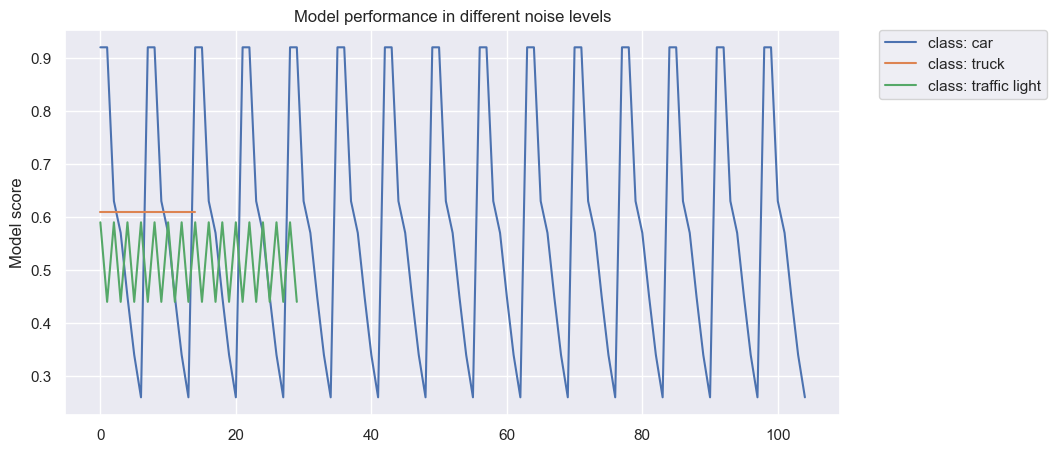

In [75]:
plot_model_results(model_results, name)

In [76]:
save_model_results(model_results, name)

In [ ]:
#Função original do JP:

In [28]:
import time  

class PredPipe():
    def __init__(self, model, image_path, noise, blur):
        self.model = model
        self.image_path = image_path
        self.image = cv2.imread(image_path)
        self.name = image_path.split('/')[-1].split('.')[0]
        self.results = {}
        self.model_scores = []
        self.noise_and_blur = {
            'noise_pctg': noise,
            'blur_pctg': blur
        }
        self.timestamp = str(int(time.time())) # add timestamp as unique identifier

    def add_noise_and_blur(self, save=False):
        image = cv2.imread(self.image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = image.astype(np.float32) / 255.0

        # Add noise
        noise = np.random.uniform(low=0.0, high=1.0, size=image.shape)
        noise_mask = np.random.binomial(1, self.noise_and_blur['noise_pctg'], size=image.shape[:-1])
        noise_mask = np.expand_dims(noise_mask, axis=-1)
        noise_mask = np.repeat(noise_mask, 3, axis=-1)
        image = noise_mask * noise + (1 - noise_mask) * image
        image = (image * 255.0).astype(np.uint8)
        noisy_image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        if save:
            noisy_image_path = f"../data/processed/noisy/{self.name}_{str(self.noise_and_blur['noise_pctg'])}_noisy_{self.timestamp}.jpg" # add timestamp to filename
        cv2.imwrite(noisy_image_path, noisy_image)

        return image, noisy_image_path

    def predict_image(self, add_noise=False, save = True):
        if add_noise:
            image, noisy_image_path = self.add_noise_and_blur(save)
            results = self.model.predict(noisy_image_path)
            result = results[0]
            if save:
                predicted_image_path = f"../data/noisy/{self.name}_{str(self.noise_and_blur['noise_pctg'])}_noisy_predicted_{self.timestamp}.jpg"
        
        else:
            results = self.model.predict(self.image_path)
            result = results[0]
            if save:
                predicted_image_path = f"../data/noisy/{self.name}_predicted_{self.timestamp}.jpg"
        
        #save model scores
        for box in result.boxes:
            class_name = result.names[box.cls[0].item()]
            class_confidence = round(box.conf[0].item(), 2)
            if class_name not in self.results:
                self.results[class_name] = []
            self.results[class_name].append(class_confidence)
            self.model_scores.append(class_confidence)
                
        img = cv2.imread(self.image_path if not add_noise else noisy_image_path)
        for box in result.boxes:
            class_id = result.names[box.cls[0].item()]
            cords = box.xyxy[0].tolist()
            cords = [round(x) for x in cords]
            conf = round(box.conf[0].item(), 2)
            cv2.rectangle(img, (cords[0], cords[1]), (cords[2], cords[3]), (0, 255, 0), 2)
            cv2.putText(img, f"{class_id} {conf}", (cords[0], cords[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
            #write predicted image to data/processed/outputs
            cv2.imwrite(predicted_image_path, img)

        return img, self.results

In [73]:
#Função que consegue pegar o semafaro mas corta a original:

In [72]:
import cv2
import numpy as np
from datetime import datetime
from torchvision import transforms
from PIL import Image

class PredPipe():
    def __init__(self, model, image_path, noise, blur):
        self.model = model
        self.image_path = image_path
        self.image = cv2.imread(image_path)
        self.name = image_path.split('/')[-1].split('.')[0]
        self.results = {}
        self.model_scores = []
        self.noise_and_blur = {
            'noise_pctg': noise,
            'blur_pctg': blur
        }
        self.timestamp = str(int(datetime.timestamp(datetime.now())))

    def add_noise_and_blur(self, save=False):
        image = cv2.imread(self.image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = image.astype(np.float32) / 255.0

        noise = np.random.uniform(low=0.0, high=1.0, size=image.shape)
        noise_mask = np.random.binomial(1, self.noise_and_blur['noise_pctg'], size=image.shape[:-1])
        noise_mask = np.expand_dims(noise_mask, axis=-1)
        noise_mask = np.repeat(noise_mask, 3, axis=-1)
        image = noise_mask * noise + (1 - noise_mask) * image
        image = (image * 255.0).astype(np.uint8)
        noisy_image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        if save:
            noisy_image_path = f"../data/processed/noisy/{self.name}_{str(self.noise_and_blur['noise_pctg'])}_noisy_{self.timestamp}.jpg"
            cv2.imwrite(noisy_image_path, noisy_image)

        return image, noisy_image_path

    def save_traffic_lights(self, image, result, image_path, timestamp):
        output_folder = "../data/processed/outputs"
        
        for box in result.boxes:
            class_id = result.names[box.cls[0].item()]
            if class_id == "traffic light":
                cords = box.xyxy[0].tolist()
                cords = [round(x) for x in cords]

                traffic_light_image = image[cords[1]:cords[3], cords[0]:cords[2]]

                traffic_light_path = f"{output_folder}/traffic_light_{timestamp}.jpg"
                cv2.imwrite(traffic_light_path, traffic_light_image)
                print(f"Semáforo recortado salvo em {traffic_light_path}")

    def predict_image(self, add_noise=False, save=True):
        if add_noise:
            image, noisy_image_path = self.add_noise_and_blur(save)
            results = self.model.predict(noisy_image_path)
            result = results[0]
            if save:
                predicted_image_path = f"../data/processed/outputs/{self.name}_{str(self.noise_and_blur['noise_pctg'])}_noisy_predicted_{self.timestamp}.jpg"
        else:
            results = self.model.predict(self.image_path)
            result = results[0]
            if save:
                predicted_image_path = f"../data/processed/outputs/{self.name}_predicted_{self.timestamp}.jpg"

        img = cv2.imread(self.image_path) if not add_noise else cv2.imread(noisy_image_path)

        for box in result.boxes:
            class_id = result.names[box.cls[0].item()]
            cords = box.xyxy[0].tolist()
            cords = [round(x) for x in cords]
            conf = round(box.conf[0].item(), 2)

            # Desenhe um rótulo com confiança, mas sem bordas verdes
            label = f"{class_id} {conf}"
            font = cv2.FONT_HERSHEY_SIMPLEX
            font_scale = 0.5
            font_thickness = 1
            font_color = (0, 0, 255)
            background_color = (0, 0, 0)
            label_size, baseline = cv2.getTextSize(label, font, font_scale, font_thickness)
            label_origin = (cords[0], cords[1] - label_size[1])
            cv2.rectangle(img, (cords[0], cords[1]), (cords[0] + label_size[0], cords[1] - label_size[1]), background_color, -1)
            cv2.putText(img, label, label_origin, font, font_scale, font_color, font_thickness)

        if save:
            cv2.imwrite(predicted_image_path, img)

        self.save_traffic_lights(img, result, self.image_path, self.timestamp)

        return img, self.results

model = YOLO('../models/yolo/yolov8m.pt')
image = "../data/frames/images/1_original.jpg"
pred = PredPipe(model, image, 0, 0)
pred.predict_image(add_noise=False)



image 1/1 c:\Users\Thiago\OneDrive\Documentos\Facul\6 Sexto semestre\TCC\TCC-CDIA\notebooks\..\data\frames\images\1_original.jpg: 384x640 7 cars, 1 truck, 2 traffic lights, 441.8ms
Speed: 1.0ms preprocess, 441.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Semáforo recortado salvo em ../data/processed/outputs/traffic_light_1697760910.jpg
Semáforo recortado salvo em ../data/processed/outputs/traffic_light_1697760910.jpg


(array([[[203, 167, 137],
         [203, 167, 137],
         [203, 167, 137],
         ...,
         [ 40,  44,  25],
         [ 42,  46,  27],
         [ 41,  45,  26]],
 
        [[203, 167, 137],
         [203, 167, 137],
         [203, 167, 137],
         ...,
         [ 45,  49,  30],
         [ 46,  50,  31],
         [ 45,  49,  30]],
 
        [[203, 167, 137],
         [203, 167, 137],
         [203, 167, 137],
         ...,
         [ 53,  57,  38],
         [ 55,  59,  40],
         [ 54,  58,  39]],
 
        ...,
 
        [[ 69,  46,  38],
         [ 69,  46,  38],
         [ 69,  46,  38],
         ...,
         [ 95,  81,  75],
         [ 95,  81,  75],
         [ 95,  81,  75]],
 
        [[ 73,  47,  40],
         [ 72,  46,  39],
         [ 70,  47,  39],
         ...,
         [ 94,  80,  74],
         [ 94,  80,  74],
         [ 94,  80,  74]],
 
        [[ 77,  51,  44],
         [ 76,  50,  43],
         [ 72,  49,  41],
         ...,
         [ 93,  79,  73],
  

In [74]:
#Função testando:

In [25]:
import cv2
import numpy as np
from datetime import datetime
from torchvision import transforms
from PIL import Image

class PredPipe():
    def __init__(self, model, image_path, noise, blur):
        self.model = model
        self.image_path = image_path
        self.image = cv2.imread(image_path)
        self.name = image_path.split('/')[-1].split('.')[0]
        self.results = {}
        self.model_scores = []
        self.noise_and_blur = {
            'noise_pctg': noise,
            'blur_pctg': blur
        }
        self.timestamp = str(int(datetime.timestamp(datetime.now())))

    def add_noise_and_blur(self, save=False):
        image = cv2.imread(self.image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = image.astype(np.float32) / 255.0

        noise = np.random.uniform(low=0.0, high=1.0, size=image.shape)
        noise_mask = np.random.binomial(1, self.noise_and_blur['noise_pctg'], size=image.shape[:-1])
        noise_mask = np.expand_dims(noise_mask, axis=-1)
        noise_mask = np.repeat(noise_mask, 3, axis=-1)
        image = noise_mask * noise + (1 - noise_mask) * image
        image = (image * 255.0).astype(np.uint8)
        noisy_image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        if save:
            noisy_image_path = f"../data/processed/noisy/{self.name}_{str(self.noise_and_blur['noise_pctg'])}_noisy_{self.timestamp}.jpg"
            cv2.imwrite(noisy_image_path, noisy_image)

        return image, noisy_image_path

    def save_traffic_lights(self, image, result, image_path, timestamp):
        output_folder = "../data/processed/outputs"
        traffic_lights = []  # Lista para salvar os semáforos detectados
        
        for box in result.boxes:
            class_id = result.names[box.cls[0].item()]
            if class_id == "traffic light":
                cords = box.xyxy[0].tolist()
                cords = [int(round(x)) for x in cords]

                # Ajuste as coordenadas para garantir que estejam dentro dos limites da imagem
                cords[0] = max(0, cords[0])
                cords[1] = max(0, cords[1])
                cords[2] = min(image.shape[1], cords[2])
                cords[3] = min(image.shape[0], cords[3])

                traffic_light_image = image[cords[1]:cords[3], cords[0]:cords[2]]

                if traffic_light_image.shape[0] > 0 and traffic_light_image.shape[1] > 0:
                    # Certifique-se de que a região recortada não é vazia
                    traffic_lights.append(traffic_light_image)
        
        if not traffic_lights:
            raise ValueError("Nenhum semáforo detectado na imagem.")
        
        for i, traffic_light_image in enumerate(traffic_lights):
            traffic_light_path = f"{output_folder}/traffic_light_{timestamp}_{i}.jpg"
            cv2.imwrite(traffic_light_path, traffic_light_image)
            print(f"Semáforo {i + 1} recortado e salvo em {traffic_light_path}")

    def predict_image(self, add_noise=False, save=True):
        if add_noise:
            image, noisy_image_path = self.add_noise_and_blur(save)
            results = self.model.predict(noisy_image_path)
            result = results[0]
            if save:
                predicted_image_path = f"../data/processed/outputs/{self.name}_{str(self.noise_and_blur['noise_pctg'])}_noisy_predicted_{self.timestamp}.jpg"
        else:
            results = self.model.predict(self.image_path)
            result = results[0]
            if save:
                predicted_image_path = f"../data/processed/outputs/{self.name}_predicted_{self.timestamp}.jpg"

        img = cv2.imread(self.image_path) if not add_noise else cv2.imread(noisy_image_path)

        for box in result.boxes:
            class_id = result.names[box.cls[0].item()]
            cords = box.xyxy[0].tolist()
            cords = [int(round(x)) for x in cords]
            conf = round(box.conf[0].item(), 2)

            # Desenhe um rótulo com confiança, mas sem bordas verdes
            label = f"{class_id} {conf}"
            font = cv2.FONT_HERSHEY_SIMPLEX
            font_scale = 0.5
            font_thickness = 1
            font_color = (0, 0, 255)
            background_color = (0, 0, 0)
            label_size, baseline = cv2.getTextSize(label, font, font_scale, font_thickness)
            label_origin = (cords[0], cords[1] - label_size[1])
            cv2.rectangle(img, (cords[0], cords[1]), (cords[0] + label_size[0], cords[1] - label_size[1]), background_color, -1)
            cv2.putText(img, label, label_origin, font, font_scale, font_color, font_thickness)

        if save:
            cv2.imwrite(predicted_image_path, img)

        self.save_traffic_lights(img, result, self.image_path, self.timestamp)

        return img, self.results


In [27]:
model = YOLO('../models/yolo/yolov8m.pt')
image = "../data/frames/images/3_original.jpg"
pred = PredPipe(model, image, 0, 0)

try:
    # Tente predizer os semáforos na imagem
    pred.predict_image(add_noise=False)
except ValueError as e:
    # Se nenhum semáforo for encontrado, imprima o erro
    print(str(e))


image 1/1 c:\Users\Thiago\OneDrive\Documentos\Facul\6 Sexto semestre\TCC\TCC-CDIA\notebooks\..\data\frames\images\3_original.jpg: 384x640 7 cars, 3 traffic lights, 508.6ms
Speed: 2.0ms preprocess, 508.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Semáforo 1 recortado e salvo em ../data/processed/outputs/traffic_light_1697908984_0.jpg
Semáforo 2 recortado e salvo em ../data/processed/outputs/traffic_light_1697908984_1.jpg
Semáforo 3 recortado e salvo em ../data/processed/outputs/traffic_light_1697908984_2.jpg
